### Library

In [176]:
# Import Library

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Machine Learning Model
from sklearn import*
from imblearn import*


### Function

In [177]:
# Fungsi untuk mendapatkan kolom numerik/kategorik

def get_cat_cols(df):
    num=list(df.columns[df.dtypes=='object'])
    return num
    
def get_num_cols(df):
    cat=list(df.columns[df.dtypes=='int64'])+list(df.columns[df.dtypes=='int32'])+list(df.columns[df.dtypes=='float64'])
    return cat

def get_head(df, n=5):
  print(f'Shape : {df.shape}')
  display(df.head(n=n))

### Data Preparation

#### 1. Load data

In [178]:
# Load Data Train
df_train = pd.read_csv('dataset/train.csv')
get_head(df_train)

Shape : (4250, 20)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [179]:
# Load Data Test
df_test = pd.read_csv('dataset/test.csv')
get_head(df_test)

Shape : (750, 20)


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [180]:
col_id = df_test[['id']]
get_head(col_id)

Shape : (750, 1)


,id
0,1
1,2
2,3
3,4
4,5


In [181]:
df_test = df_test.drop(columns=['id'], axis=1)
df_test['churn'] = 'test'
get_head(df_test)

Shape : (750, 20)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,test
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,test
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,test
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,test
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,test


#### 2. EDA

##### Data Quality Checking

In [182]:
# check missing value
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [183]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [184]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          750 non-null    object 
 1   account_length                 750 non-null    int64  
 2   area_code                      750 non-null    object 
 3   international_plan             750 non-null    object 
 4   voice_mail_plan                750 non-null    object 
 5   number_vmail_messages          750 non-null    int64  
 6   total_day_minutes              750 non-null    float64
 7   total_day_calls                750 non-null    int64  
 8   total_day_charge               750 non-null    float64
 9   total_eve_minutes              750 non-null    float64
 10  total_eve_calls                750 non-null    int64  
 11  total_eve_charge               750 non-null    float64
 12  total_night_minutes            750 non-null    flo

##### Descriptive Statistics



In [185]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [186]:
df_train.describe(include ='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


Kalau kita perhatikan dari deskripsi di atas:

* Terdapat data 51 Negara yang unik di Amerika Serikat
* Fitur: International_plan, voice_mail_plan, churn merupakan variabel kategori biner, dengan nilai unik no/ yes.
* Terdapat column (fitur) memiliki rata-rata dan median (Q2) yang hampir sama. Jadi kemungkinan bahwa distribusi datanya masuk dalam distribusi normal. Nanti akan kita buktikan apakah benar distribusi datanya masuk dalam distribusi normal atau tidak dengan membuat plotnya.
* Separuh dari pelanggan tidak menggunakan pesan suara. Terlihat pada fitur 'number_vmail_messages' mediannya 0.
* Panggilan layanan pelanggan cukup jarang, kita dapat melihat bahwa kebanyakan orang jarang menelepon untuk layanan penggan.
* Layanan panggilan internasional juga sangat murah, tetapi jika dibandingkan dengan panggilan domestik biayanya jauh lebih tinggi.



##### Target Variable Distribution

In [187]:
# define target variable
target_variable = 'churn'

(4250, 20)
[3652, 598]


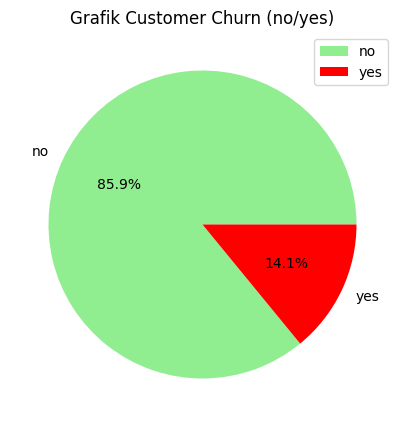

In [188]:
labels = df_train['churn'].value_counts().keys().tolist()
values = df_train['churn'].value_counts().values.tolist()
print(df_train.shape)
print(values)
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(values, 
        labels=labels, 
#         explode=(0,0.1), 
        autopct='%1.1f%%',
        colors=['lightgreen', 'red'])
plt.legend()
plt.title('Grafik Customer Churn (no/yes)')
plt.show()

**Data sangat tidak seimbang _(imbalanced)._**

##### Numerical Feature Distribution

In [189]:
num_col = get_num_cols(df_train)
num_col

['account_length',
 'number_vmail_messages',
 'total_day_calls',
 'total_eve_calls',
 'total_night_calls',
 'total_intl_calls',
 'number_customer_service_calls',
 'total_day_minutes',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_charge']

In [190]:
# numerical variable distribution

for col in num_col:
  fig = px.histogram(df_train, x=col, marginal='box', width=400, height=300, color=target_variable)
  fig.show()

</p>Seperti yang sudah diduga, secara keseluruhan pada data numerical di atas, distribusinya masuk dalam distribusi normal.</p>

**Insight**
* Churn berbanding lurus dengan panggilan layanan pelanggan. Artinya, churn meningkat dengan meningkatnya panggilan layanan pelanggan.


C:\Users\Acer\AppData\Local\Temp\ipykernel_11760\4139573691.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



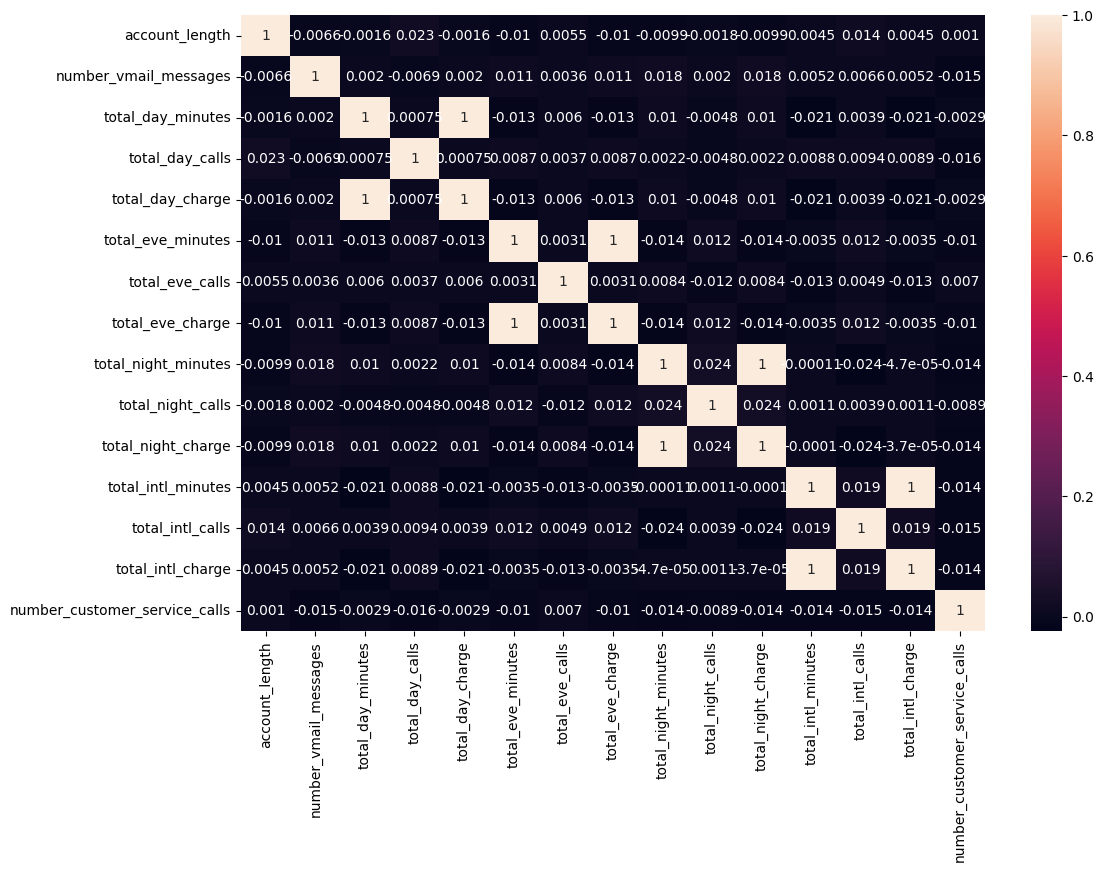

In [191]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

##### Descriptive

Ada beberapa kolom yang memiliki korelasi atau keterkaitan data pada dataset. Sebagai contoh:
* Fitur total_day_charge dengan total_day_minutes memiliki nilai korelasi 1, sehingga dapat dilakukan dengan menghapus salah satu kolom.

Kolom yang akan dihapus:
_total_day_charge, total_eve_charge, total_night_charge, dan total_intl_charge._

In [192]:
drop_column_num = ['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge']
df_train = df_train.drop(drop_column_num, axis = 1,)
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,348.5,108,212.6,118,7.5,7,3,no


In [193]:
# Data test
df_test = df_test.drop(drop_column_num, axis = 1,)
df_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,test
1,AL,118,area_code_510,yes,no,0,223.4,98,220.6,101,203.9,118,6.3,6,0,test
2,IA,62,area_code_415,no,no,0,120.7,70,307.2,76,203.0,99,13.1,6,4,test
3,VT,93,area_code_510,no,no,0,190.7,114,218.2,111,129.6,121,8.1,3,3,test
4,NE,174,area_code_415,no,no,0,124.3,76,277.1,112,250.7,115,15.5,5,3,test


In [194]:
# Num Col Data Train Setelah Fitur yang tidak diperlukan dihapus
num_col = get_num_cols(df_train)
num_col

['account_length',
 'number_vmail_messages',
 'total_day_calls',
 'total_eve_calls',
 'total_night_calls',
 'total_intl_calls',
 'number_customer_service_calls',
 'total_day_minutes',
 'total_eve_minutes',
 'total_night_minutes',
 'total_intl_minutes']

##### Categorical Feature Distribution

In [195]:
cat_col = get_cat_cols(df_train)
cat_col

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [196]:
for i in cat_col:
  fig = px.histogram(df_train, x=i, width=500, height=400, color=target_variable, barmode="group")
  fig.show()

**Insight**
* Churn rate tinggi untuk pelanggan dengan paket internasional (international_plan) jika dibandingkan dengan pelanggan yang tidak memiliki paket internasional dan berlaku juga untuk paket pesan suara (voice_mail_plan).

In [197]:
# Menggabungkan dataframe train dan test untuk dilakukan prepocessing secara bersama-sama
df_all = pd.concat([df_train, df_test], axis=0, ignore_index=True)
print(df_all.shape)
df_all.head()

(5000, 16)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,348.5,108,212.6,118,7.5,7,3,no


In [198]:
# MENGHAPUS KOLOM YANG TIDAK AKAN DIGUNAKAN DALAM MODEL MACHINE LEARNING

# drop_column_num = ['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge']
drop_column_cat = ['state', 'area_code']

# df_all = df_all.drop(drop_column_num, axis = 1)
df_all = df_all.drop(drop_column_cat, axis = 1)
print(df_all.shape)
df_all.head()

(5000, 14)


,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,no
1,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,no
2,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,no
3,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,no
4,121,no,yes,24,218.2,88,348.5,108,212.6,118,7.5,7,3,no


In [199]:
num_col = get_num_cols(df_all)
num_col

['account_length',
 'number_vmail_messages',
 'total_day_calls',
 'total_eve_calls',
 'total_night_calls',
 'total_intl_calls',
 'number_customer_service_calls',
 'total_day_minutes',
 'total_eve_minutes',
 'total_night_minutes',
 'total_intl_minutes']

In [200]:
cat_col = get_cat_cols(df_all.drop([target_variable], 1))
cat_col

C:\Users\Acer\AppData\Local\Temp\ipykernel_11760\1980206008.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



['international_plan', 'voice_mail_plan']

In [201]:
X = df_all.drop([target_variable], axis=1)
y = df_all[[target_variable]]

In [202]:
X.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1
1,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0
2,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2
3,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3
4,121,no,yes,24,218.2,88,348.5,108,212.6,118,7.5,7,3


In [203]:
y.head()

,churn
0,no
1,no
2,no
3,no
4,no


### Manual Process

#### Data Prepocessing

##### Normalization - Numerical Feature

In [204]:
num_col = get_num_cols(X)
num_col

['account_length',
 'number_vmail_messages',
 'total_day_calls',
 'total_eve_calls',
 'total_night_calls',
 'total_intl_calls',
 'number_customer_service_calls',
 'total_day_minutes',
 'total_eve_minutes',
 'total_night_minutes',
 'total_intl_minutes']

In [205]:
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X[num_col])

In [206]:
X_transform = pd.DataFrame(X_transform,columns = num_col)
print(X_transform.shape)
X_transform.head()

(5000, 11)


,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes
0,0.438017,0.500000,0.745455,0.605882,0.588571,0.15,0.111111,0.459744,0.537531,0.644051,0.685
1,0.561983,0.000000,0.690909,0.647059,0.594286,0.25,0.000000,0.692461,0.333242,0.411646,0.610
2,0.342975,0.000000,0.430303,0.517647,0.508571,0.35,0.222222,0.851778,0.170195,0.498481,0.330
3,0.305785,0.000000,0.684848,0.717647,0.691429,0.15,0.333333,0.474253,0.407754,0.473165,0.505
4,0.495868,0.461538,0.533333,0.635294,0.674286,0.35,0.333333,0.620768,0.958207,0.538228,0.375


##### One Hot Encoder - Categorical Feature

In [207]:
cat_col = get_cat_cols(df_all.drop([target_variable], axis=1))
cat_col

['international_plan', 'voice_mail_plan']

In [208]:
print(X_transform.shape)
X_transform.head()

(5000, 11)


,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes
0,0.438017,0.500000,0.745455,0.605882,0.588571,0.15,0.111111,0.459744,0.537531,0.644051,0.685
1,0.561983,0.000000,0.690909,0.647059,0.594286,0.25,0.000000,0.692461,0.333242,0.411646,0.610
2,0.342975,0.000000,0.430303,0.517647,0.508571,0.35,0.222222,0.851778,0.170195,0.498481,0.330
3,0.305785,0.000000,0.684848,0.717647,0.691429,0.15,0.333333,0.474253,0.407754,0.473165,0.505
4,0.495868,0.461538,0.533333,0.635294,0.674286,0.35,0.333333,0.620768,0.958207,0.538228,0.375


In [209]:
print(y.shape)
y.head()

(5000, 1)


,churn
0,no
1,no
2,no
3,no
4,no


In [210]:
new_all = pd.concat([y, X[cat_col], X_transform], axis=1) #Data Train
print(new_all.shape)

(5000, 14)


In [211]:
new_all.churn.replace(['yes','no','test'],[1,0,-8888],inplace=True)
print(new_all.shape)
new_all.head()

(5000, 14)


,churn,international_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes
0,0,no,yes,0.438017,0.500000,0.745455,0.605882,0.588571,0.15,0.111111,0.459744,0.537531,0.644051,0.685
1,0,no,no,0.561983,0.000000,0.690909,0.647059,0.594286,0.25,0.000000,0.692461,0.333242,0.411646,0.610
2,0,yes,no,0.342975,0.000000,0.430303,0.517647,0.508571,0.35,0.222222,0.851778,0.170195,0.498481,0.330
3,0,yes,no,0.305785,0.000000,0.684848,0.717647,0.691429,0.15,0.333333,0.474253,0.407754,0.473165,0.505
4,0,no,yes,0.495868,0.461538,0.533333,0.635294,0.674286,0.35,0.333333,0.620768,0.958207,0.538228,0.375


In [212]:
labelencoder=LabelEncoder()

new_all['international_plan'] = labelencoder.fit_transform(new_all['international_plan'])
new_all['voice_mail_plan'] = labelencoder.fit_transform(new_all['voice_mail_plan'])


new_all.head()

,churn,international_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes
0,0,0,1,0.438017,0.500000,0.745455,0.605882,0.588571,0.15,0.111111,0.459744,0.537531,0.644051,0.685
1,0,0,0,0.561983,0.000000,0.690909,0.647059,0.594286,0.25,0.000000,0.692461,0.333242,0.411646,0.610
2,0,1,0,0.342975,0.000000,0.430303,0.517647,0.508571,0.35,0.222222,0.851778,0.170195,0.498481,0.330
3,0,1,0,0.305785,0.000000,0.684848,0.717647,0.691429,0.15,0.333333,0.474253,0.407754,0.473165,0.505
4,0,0,1,0.495868,0.461538,0.533333,0.635294,0.674286,0.35,0.333333,0.620768,0.958207,0.538228,0.375


In [213]:
print(df_all.shape)
new_all.head()

(5000, 14)


,churn,international_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes
0,0,0,1,0.438017,0.500000,0.745455,0.605882,0.588571,0.15,0.111111,0.459744,0.537531,0.644051,0.685
1,0,0,0,0.561983,0.000000,0.690909,0.647059,0.594286,0.25,0.000000,0.692461,0.333242,0.411646,0.610
2,0,1,0,0.342975,0.000000,0.430303,0.517647,0.508571,0.35,0.222222,0.851778,0.170195,0.498481,0.330
3,0,1,0,0.305785,0.000000,0.684848,0.717647,0.691429,0.15,0.333333,0.474253,0.407754,0.473165,0.505
4,0,0,1,0.495868,0.461538,0.533333,0.635294,0.674286,0.35,0.333333,0.620768,0.958207,0.538228,0.375


In [214]:
new_all.tail()

,churn,international_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes
4995,-8888,0,0,0.533058,0.0,0.600000,0.570588,0.634286,0.35,0.000000,0.339687,0.622216,0.513165,0.565
4996,-8888,0,0,0.297521,0.0,0.715152,0.494118,0.640000,0.10,0.333333,0.504125,0.743745,0.612152,0.615
4997,-8888,0,0,0.623967,0.0,0.545455,0.429412,0.645714,0.10,0.333333,0.524040,0.706076,0.540759,0.735
4998,-8888,0,0,0.247934,0.0,0.539394,0.752941,0.554286,0.20,0.111111,0.400000,0.475117,0.537722,0.680
4999,-8888,0,0,0.446281,0.0,0.406061,0.541176,0.508571,0.30,0.000000,0.537127,0.472092,0.568101,0.425


In [215]:
train = new_all[new_all['churn']>=0]
get_head(train)

Shape : (4250, 14)


,churn,international_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes
0,0,0,1,0.438017,0.500000,0.745455,0.605882,0.588571,0.15,0.111111,0.459744,0.537531,0.644051,0.685
1,0,0,0,0.561983,0.000000,0.690909,0.647059,0.594286,0.25,0.000000,0.692461,0.333242,0.411646,0.610
2,0,1,0,0.342975,0.000000,0.430303,0.517647,0.508571,0.35,0.222222,0.851778,0.170195,0.498481,0.330
3,0,1,0,0.305785,0.000000,0.684848,0.717647,0.691429,0.15,0.333333,0.474253,0.407754,0.473165,0.505
4,0,0,1,0.495868,0.461538,0.533333,0.635294,0.674286,0.35,0.333333,0.620768,0.958207,0.538228,0.375


In [216]:
# DATA TEST
test = new_all[new_all['churn']<0]
test = test.drop('churn', axis=1)
print(test.shape)

# test.head()
test = test.reset_index(drop=True)
test.head()

(750, 13)


,international_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes
0,0,1,0.524793,0.480769,0.666667,0.582353,0.520000,0.15,0.111111,0.754196,0.542755,0.619494,0.500
1,1,0,0.483471,0.000000,0.593939,0.594118,0.674286,0.30,0.000000,0.635562,0.606544,0.516203,0.315
2,0,0,0.252066,0.000000,0.424242,0.447059,0.565714,0.30,0.444444,0.343385,0.844652,0.513924,0.655
3,0,0,0.380165,0.000000,0.690909,0.652941,0.691429,0.15,0.333333,0.542532,0.599945,0.328101,0.405
4,0,0,0.714876,0.000000,0.460606,0.658824,0.657143,0.25,0.333333,0.353627,0.761892,0.634684,0.775


In [217]:
get_head(col_id)

Shape : (750, 1)


,id
0,1
1,2
2,3
3,4
4,5


In [218]:
df_test = pd.concat([col_id, test], axis=1)

print(df_test.shape)
df_test.head()

(750, 14)


,id,international_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes
0,1,0,1,0.524793,0.480769,0.666667,0.582353,0.520000,0.15,0.111111,0.754196,0.542755,0.619494,0.500
1,2,1,0,0.483471,0.000000,0.593939,0.594118,0.674286,0.30,0.000000,0.635562,0.606544,0.516203,0.315
2,3,0,0,0.252066,0.000000,0.424242,0.447059,0.565714,0.30,0.444444,0.343385,0.844652,0.513924,0.655
3,4,0,0,0.380165,0.000000,0.690909,0.652941,0.691429,0.15,0.333333,0.542532,0.599945,0.328101,0.405
4,5,0,0,0.714876,0.000000,0.460606,0.658824,0.657143,0.25,0.333333,0.353627,0.761892,0.634684,0.775


#### Train-test Split

In [219]:
X = train.drop(target_variable, axis=1)
y = train[[target_variable]]

In [220]:
get_head(X)

Shape : (4250, 13)


,international_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes
0,0,1,0.438017,0.500000,0.745455,0.605882,0.588571,0.15,0.111111,0.459744,0.537531,0.644051,0.685
1,0,0,0.561983,0.000000,0.690909,0.647059,0.594286,0.25,0.000000,0.692461,0.333242,0.411646,0.610
2,1,0,0.342975,0.000000,0.430303,0.517647,0.508571,0.35,0.222222,0.851778,0.170195,0.498481,0.330
3,1,0,0.305785,0.000000,0.684848,0.717647,0.691429,0.15,0.333333,0.474253,0.407754,0.473165,0.505
4,0,1,0.495868,0.461538,0.533333,0.635294,0.674286,0.35,0.333333,0.620768,0.958207,0.538228,0.375


In [221]:
get_head(y)

Shape : (4250, 1)


,churn
0,0
1,0
2,0
3,0
4,0


In [222]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 11, stratify=y)
print('Shape of X_train dan y_train: ',X_train.shape, y_train.shape)
print('Shape of X_test dan y_test: ',X_test.shape, y_test.shape)

Shape of X_train dan y_train:  (2975, 13) (2975, 1)
Shape of X_test dan y_test:  (1275, 13) (1275, 1)


In [223]:
y.value_counts(normalize=True)

churn
0        0.859294
1        0.140706
dtype: float64

In [224]:
y_train.value_counts(normalize=True)

churn
0        0.85916
1        0.14084
dtype: float64

In [225]:
y_test.value_counts(normalize=True)

churn
0        0.859608
1        0.140392
dtype: float64

#### Resampling

In [226]:
y_train.value_counts()

churn
0        2556
1         419
dtype: int64

In [227]:
y_train.value_counts(normalize=True)

churn
0        0.85916
1        0.14084
dtype: float64

In [228]:
# Random Under Sampling
X_rus, y_rus = RandomUnderSampler().fit_resample(X_train, y_train)

In [229]:
y_rus.value_counts()

churn
0        419
1        419
dtype: int64

In [230]:
y_rus.value_counts(normalize=True)

churn
0        0.5
1        0.5
dtype: float64

#### Modeling

##### kNN Model - Original Data

In [231]:
# membuat fungsi evaluasi model
def evaluasi_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return roc_auc_score(y_test, y_pred)

In [232]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [233]:
evaluasi_model(knn, X_train, y_train)

0.7615909591732308

In [234]:
evaluasi_model(knn, X_test, y_test)

0.6621793826203972

##### kNN Model - Random Undersampling Data

In [235]:
knn = KNeighborsClassifier()
knn.fit(X_rus, y_rus)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [236]:
evaluasi_model(knn, X_rus, y_rus)

0.8723150357995226

In [237]:
evaluasi_model(knn, X_test, y_test)

0.796515006320597

##### Decision Tree

In [238]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [239]:
evaluasi_model(dtc, X_test, y_test)

0.8427114341638462

In [240]:
evaluasi_model(dtc,  X_rus, y_rus)

1.0

### Test Model

Test model dengan data test:

In [241]:
print(df_test.shape)
df_test.head()

(750, 14)


,id,international_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes
0,1,0,1,0.524793,0.480769,0.666667,0.582353,0.520000,0.15,0.111111,0.754196,0.542755,0.619494,0.500
1,2,1,0,0.483471,0.000000,0.593939,0.594118,0.674286,0.30,0.000000,0.635562,0.606544,0.516203,0.315
2,3,0,0,0.252066,0.000000,0.424242,0.447059,0.565714,0.30,0.444444,0.343385,0.844652,0.513924,0.655
3,4,0,0,0.380165,0.000000,0.690909,0.652941,0.691429,0.15,0.333333,0.542532,0.599945,0.328101,0.405
4,5,0,0,0.714876,0.000000,0.460606,0.658824,0.657143,0.25,0.333333,0.353627,0.761892,0.634684,0.775


### KNeighborsClassifier

In [242]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

# Accuracy Train
print('KNeighborsClassifier')
print(' ')
print('Accuracy Train')
knn_Train_pred=knn.predict(X_train)
print(classification_report(y_train,knn_Train_pred))

print('===================================================')
# Accuracy Test
print('Accuracy Test')
knn_Test_pred=knn.predict(X_test)
print(classification_report(y_test,knn_Test_pred))

# y_pred = knn.predict(X_test)
# accuracy_knn = accuracy_score(y_pred, y_test)
# print(accuracy_knn)

KNeighborsClassifier
 
Accuracy Train


c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2556
           1       0.91      0.28      0.43       419

    accuracy                           0.90      2975
   macro avg       0.90      0.64      0.69      2975
weighted avg       0.90      0.90      0.87      2975

Accuracy Test
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1096
           1       0.91      0.27      0.42       179

    accuracy                           0.89      1275
   macro avg       0.90      0.63      0.68      1275
weighted avg       0.90      0.89      0.87      1275



In [243]:
# print("Model KNN ini mampu memprediksi dengan akurasi sebesar {0:.2f}%".format(accuracy_knn * 100))

In [244]:
X_test_model_knn = df_test.drop(['id'], axis=1)
y_test_model_knn = knn.predict(X_test_model_knn)

In [245]:
ids = df_test['id']
y_knn = y_test_model_knn

output_knn = pd.DataFrame({'id': ids, 'churn': y_knn})
output_knn.head()

,id,churn
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [246]:
output_knn.to_csv('hasil_prediksi_knn.csv', index=False)

### Random Forest

In [247]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Accuracy Train
print('RandomForestClassifier')
print(' ')
print('Accuracy Train')
rf_Train_pred=rf.predict(X_train)
print(classification_report(y_train,rf_Train_pred))

print('===================================================')
# Accuracy Test
print('Accuracy Test')
rf_Test_pred=rf.predict(X_test)
print(classification_report(y_test,rf_Test_pred))

# y_pred = rf.predict(X_test)
# accuracy_rf = accuracy_score(y_pred, y_test)
# print(accuracy_rf)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11760\2438855082.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier
 
Accuracy Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2556
           1       1.00      1.00      1.00       419

    accuracy                           1.00      2975
   macro avg       1.00      1.00      1.00      2975
weighted avg       1.00      1.00      1.00      2975

Accuracy Test
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1096
           1       0.96      0.72      0.82       179

    accuracy                           0.96      1275
   macro avg       0.96      0.85      0.90      1275
weighted avg       0.96      0.96      0.95      1275



In [248]:
# print("Model Random Forest ini mampu memprediksi dengan akurasi sebesar {0:.2f}%".format(accuracy_rf * 100))

In [249]:
# output.to_csv('hasil_prediksi_rf.csv', index=False)

### XGB

In [250]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Accuracy Train
print('XGBClassifier')
print(' ')
print('Accuracy Train')
xgb_Train_pred=xgb.predict(X_train)
print(classification_report(y_train,xgb_Train_pred))

print('===================================================')
# Accuracy Test
print('Accuracy Test')
xgb_Test_pred=xgb.predict(X_test)
print(classification_report(y_test,xgb_Test_pred))

# y_pred = xgb.predict(X_test)
# accuracy = accuracy_score(y_pred, y_test)
# print(accuracy)

XGBClassifier
 
Accuracy Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2556
           1       1.00      1.00      1.00       419

    accuracy                           1.00      2975
   macro avg       1.00      1.00      1.00      2975
weighted avg       1.00      1.00      1.00      2975

Accuracy Test
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1096
           1       0.92      0.74      0.82       179

    accuracy                           0.96      1275
   macro avg       0.94      0.87      0.90      1275
weighted avg       0.95      0.96      0.95      1275



In [251]:
# print("Model XGBoost ini mampu memprediksi dengan akurasi sebesar {0:.2f}%".format(accuracy * 100))

In [252]:
# output.to_csv('hasil_prediksi_xgb.csv', index=False)